# Labolatorium 6
## Rozwiązywanie układów równań liniowych

---
### Przydatne funkcje z których będziemy korzystać (z nimi głównie porównujemy nasze rozwiązania):
- `numpy.linalg.solve`
- `numpy.linalg.lstsq`
- `scipy.linalg.lu`

---
### Przydatne importy

In [231]:
import numpy as np
from numpy import linalg as npln
from scipy import linalg as scln
import time

---
### Zadanie 1 Metoda Gaussa-Jordana

Napisz i sprawdź funkcję rozwiązującą układ równań liniowych $n \times n$ metodą **Gaussa-Jordana**. Dla rozmiarów macierzy współczynników większych nż $500 \times 500$ porównaj czasy działania zaimplementowanej funkcji z czasami uzyskanymi dla wybranych funkcji bibliotecznych.

Ponieważ w zadaniu nie zostało wyszczególnione czy należy użyć `pivotingu` (i jeśli tak to częsciowego czy pełnego), moja implementacja zawiera pełny `pivoting`.

In [232]:
def gauss_Jordan(A, B):
    n = B.shape[0]
    result = np.concatenate((A, B), axis=1)
    
    #scalling so that max element in each row in A array is 1
    result = result/np.max(result[:, :-1], axis=1, keepdims=True)
    
    permutations = []
    # start pivoting
    for i in range(n):
        # find potential divider
        p_index = np.unravel_index(
            np.argmax(np.abs(result[i:, i:-1])), result[i:, i:-1].shape
        )
        # shift
        p_index = (p_index[0]+i, p_index[1]+i)
        permutations.append(p_index[1])

        # swap (permutate)
        result[[i, p_index[0]]] = result[[p_index[0], i]]
        result[:,[i, p_index[1]]] = result[:,[p_index[1], i]]

        for j in range(i + 1, n):
            tmp = result[j,i] / result[i,i]
            result[j] -= tmp * result[i]
            result[j,i] = 0.0

    
#     back substitution and division
    for i in range(n-1, -1, -1):
        for j in range(i-1, -1, -1):
            tmp = result[j,i] / result[i,i]
            result[j] -= tmp * result[i]
            result[j, i] = 0.0 
        result[i, -1] /= result[i, i]
        
    X = result[:, -1]
#     coming back to first order using saved permutations
    for i in range(n-1, -1, -1):
        p_index = permutations[i]
        X[[i,p_index]] = X[[p_index, i]]
    
    return X

#### Teraz czas przetestować daną funkcję.
W tym celu potrzebujemy danych wejściowych. Poniższa funkcja generuje losowy układ, dba jednak o to aby był on rozwiązywalny - $det(A) \neq 0$.

In [233]:
def generate_random_equations(size, min_val = -100.0 , max_val = 100.0):
    err = 10**(-8)
    A = np.random.uniform(low = min_val, high = max_val, size = (size, size))
    while np.linalg.det(A)<err:
        A = np.random.uniform(low = min_val, high = max_val, size = (size, size))
    B = np.random.uniform(low = min_val, high = max_val, size = (size, 1))
    return A, B

#### Należy również porównać czas wykonania różnych algorytmów i funkcji bibliotecznych
Poniższa funkcja mierzy czas wykonania danego algorytmu. Wypisuje ona zmierzony czas na standardowe wyjście i zwraca to, co zwrócił zadany algorytm.

In [234]:
def benchmark(algorithm, algorithm_name, **args):
    start = time.time()
    result = algorithm(**args)
    end = time.time()
    print(f"Algorithm {algorithm_name} took {end-start}s to execute")
    return result
   

#### Poniżej znajduje się porównanie czasów wykonania i poprawności wyników dla $n = 500, 750, 1000$

In [235]:
for n in [500, 750, 1000]:
    A, B = generate_random_equations(n)
    print(f"\n----------------------\n Macierz rozmiaru {n}x{n}\n")
    my_results = benchmark(gauss_Jordan, "Gauss Jordan", A = A, B = B)
    linalg_solve_results = benchmark(npln.solve, "numpy.linalg.solve", a = A, b = B)
    linalg_lstsq_results = benchmark(npln.lstsq, "numpy.linalg.lstsq", a = A, b = B)[0]
    
    print("\n Normy wektorów wynikowych (aby porównać poprawność rozwiązania): \n")
    print(f"Gauss Jordan - {npln.norm(my_results)}")
    print(f"numpy.linalg.solve - {npln.norm(linalg_solve_results)}")
    print(f"numpy.linalg.lstsq - {npln.norm(linalg_lstsq_results)}")


----------------------
 Macierz rozmiaru 500x500

Algorithm Gauss Jordan took 1.0004756450653076s to execute
Algorithm numpy.linalg.solve took 0.005590915679931641s to execute
Algorithm numpy.linalg.lstsq took 0.06232953071594238s to execute

 Normy wektorów wynikowych (aby porównać poprawność rozwiązania): 

Gauss Jordan - 56.63819957126926
numpy.linalg.solve - 56.63819957127193
numpy.linalg.lstsq - 56.638199571268366

----------------------
 Macierz rozmiaru 750x750



/home/mikey/projects/mownit/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


Algorithm Gauss Jordan took 2.2732043266296387s to execute
Algorithm numpy.linalg.solve took 0.009892463684082031s to execute
Algorithm numpy.linalg.lstsq took 0.1766347885131836s to execute

 Normy wektorów wynikowych (aby porównać poprawność rozwiązania): 

Gauss Jordan - 22.148968490349226
numpy.linalg.solve - 22.14896849033933
numpy.linalg.lstsq - 22.148968490345077

----------------------
 Macierz rozmiaru 1000x1000

Algorithm Gauss Jordan took 4.834527969360352s to execute
Algorithm numpy.linalg.solve took 0.021613121032714844s to execute
Algorithm numpy.linalg.lstsq took 0.5034530162811279s to execute

 Normy wektorów wynikowych (aby porównać poprawność rozwiązania): 

Gauss Jordan - 45.38638743499064
numpy.linalg.solve - 45.386387434991114
numpy.linalg.lstsq - 45.38638743499016


#### Analiza wyników

Jak widać, napisana przeze mnie metoda realizująca algorytm Gaussa Jordana jest zdecydowanie wolniejsza od funkcji bibliotecznych ( w tym zestawieniu wygrywa `numpy.linalg.solve`). Norma z wektora wynikowego, która posłużyła nam do sprawdzenia poprawności wyniku, jest równa wynikom obu funkcji bibliotecznych z dokładnością do około 10 miejsc po przecinku - co pozwala twierdzić, że `gauss_Jordan` działa poprawnie.

---
### Zadanie 2 Faktoryzacja LU

Napisz i sprawdź funkcję dokonującą faktoryzacji **A = LU** macierzy **A**. Zastosuj częściowe poszukiwanie elementu wiodącego oraz skalowanie.

Poniższa funkcja zwraca krotkę `(P, L, U)`, gdzie `P` to macierz permutacji, a `L` i `U` to wyniki faktoryzacji LU. Powyższe macierze są związane równością:

$ P \cdot A = L \cdot U$

In [236]:
def lu_factor(A):
    n = A.shape[0]
    P = np.identity(n)
    L = np.zeros((n, n))

    # scalling
    max_w = 1.0 / np.max(A, axis=0, keepdims=1)

    U = A * max_w.T
    
    for i in range(n):
        # half pivoting
        p_index = i + np.argmax(np.abs(A[i:, i]))
        U[[i, p_index]] = U[[p_index, i]]
        P[[i, p_index]] = P[[p_index, i]]
        L[[i, p_index]] = L[[p_index, i]]
        
        for j in range(i+1, n):
            factor = U[j,i] / U[i,i]
            L[j, i] = factor
            U[j] -= factor * U[i]
            U[j, i] = 0.0

    P = P * max_w
    L = L + np.identity(n)
            
    return P, L, U

### Czas przetestować wyżej powyższą funkcję

Zrobimy to jak poprzednio - porównamy czasy wykonania do funkcji bibliotecznej `scipy.linalg.lu` dla losowao wygenerowanych macierzy $n\times n$ ($n = 500, 750, 1000$). Sprawdzimy także poprawność zwracanych wyników (czy równanie $P \cdot A = L \cdot U$ jest spełnione) poprzez wyliczenie norm z danych macierzy.

In [237]:
for n in [500, 750, 1000]:
    A, _ = generate_random_equations(n)
    print(f"\n----------------------\n Macierz rozmiaru {n}x{n}\n")
    P, L, U = benchmark(lu_factor, "lu_factor", A = A)
    benchmark(scln.lu, "scipy.linalg.lu", a = A)
    
    print("\nNormy wektorów wynikowych (aby porównać poprawność rozwiązania): \n")
    print(f"P * A - {npln.norm(P @ A)}")
    print(f"L * U - {npln.norm(L @ U)}")


----------------------
 Macierz rozmiaru 500x500

Algorithm lu_factor took 0.5874474048614502s to execute
Algorithm scipy.linalg.lu took 0.006825685501098633s to execute

Normy wektorów wynikowych (aby porównać poprawność rozwiązania): 

P * A - 289.91516074674206
L * U - 289.91516074674223

----------------------
 Macierz rozmiaru 750x750

Algorithm lu_factor took 1.3176164627075195s to execute
Algorithm scipy.linalg.lu took 0.025222063064575195s to execute

Normy wektorów wynikowych (aby porównać poprawność rozwiązania): 

P * A - 434.3776400328939
L * U - 434.37764003289374

----------------------
 Macierz rozmiaru 1000x1000

Algorithm lu_factor took 2.2854411602020264s to execute
Algorithm scipy.linalg.lu took 0.02901482582092285s to execute

Normy wektorów wynikowych (aby porównać poprawność rozwiązania): 

P * A - 578.6653677394397
L * U - 578.6653677394403


#### Analiza wyników

Tak jak można było się spodziewać - funkcja biblioteczna znów okazała się być zdecydowanie szybsza. Co do wyniku samej faktoryzacji można uznać ją za poprawną - normy z $P \cdot A$ oraz $L \cdot U$ są równe z dokładnością do  około kilkunastu miejsc poprzecinku.

---
### Zadanie 3 Analiza obwodu elektrycznego

Napisz program, który:

---
a) Wczytuje z pliku listę krawędzi grafu opisującego obwód elektryczny. Wagi krawędzi określają opór fragmentu obwodu między dwoma węzłami. Wierzchołki grafu identyfikowane są przez liczby naturalne.

Do operacji na grafach będziemy używali biblioteki `networkx`.\
Napisałem moduł pozwalający na generowanie, zapisywanie i wczytywanie z pliku grafów z treści zadania.

In [241]:
from graph_generator import *
import networkx as nx

def print_graph(G):
    for u, v, data in G.edges(data=True):
        print(f"u - {u}, v - {v}, R = {data['R']}, sem = {data['sem']}, idx = {data['index']}")

Zanim przejdziemy do realizacji podpunktu *a)*, wygeneruję wszystkie grafy zadane w podpunkcie *f)* i zapiszę je do pliku

In [242]:
gen_and_save(connected_graph, "connected_graph", node_number = 50)
gen_and_save(cubic, "cubic")
gen_and_save(bridge_graph, "bridge_graph", node_number = 30)
gen_and_save(grid, "grid", node_number = 20)

Wczytywanie grafu z pliku

In [243]:
G = read_graph_from_file("cubic")
print_graph(G)

u - 0, v - 1, R = 86.55191196741465, sem = 0, idx = 0
u - 0, v - 3, R = 19.89586771530256, sem = 0, idx = 1
u - 0, v - 4, R = 94.66784844107119, sem = 0, idx = 2
u - 1, v - 2, R = 89.89505382532178, sem = 0, idx = 3
u - 1, v - 7, R = 53.79101349198353, sem = 0, idx = 4
u - 3, v - 2, R = 5.601931422558604, sem = 0, idx = 5
u - 3, v - 5, R = 33.14618699954779, sem = 0, idx = 7
u - 4, v - 5, R = 5.605641731212896, sem = 0, idx = 8
u - 4, v - 7, R = 1.737646837717255, sem = 0, idx = 9
u - 2, v - 6, R = 69.47327457572612, sem = 0, idx = 6
u - 7, v - 6, R = 21.797541399161524, sem = 0, idx = 11
u - 6, v - 5, R = 34.207663979474226, sem = 0, idx = 10


b) Wczytuje dodatkowo trójkę liczb (s, t, E), przy czym para (s, t) wskazuje między którymi węzłami sieci przyłożono siłę elektromotoryczną E. Opór wewnętrzny
SEM można zaniedbać.

In [244]:
s = int(input("Podaj s - "))

Podaj s - 3


In [245]:
t = int(input("Podaj t - "))

Podaj t - 2


In [246]:
E = int(input("Podaj E - "))

Podaj E - 30


In [247]:
def add_sem(graph, s, t, E):
    graph[s][t]['sem'] = E

In [248]:
add_sem(G, s, t, E)
print_graph(G)

u - 0, v - 1, R = 86.55191196741465, sem = 0, idx = 0
u - 0, v - 3, R = 19.89586771530256, sem = 0, idx = 1
u - 0, v - 4, R = 94.66784844107119, sem = 0, idx = 2
u - 1, v - 2, R = 89.89505382532178, sem = 0, idx = 3
u - 1, v - 7, R = 53.79101349198353, sem = 0, idx = 4
u - 3, v - 2, R = 5.601931422558604, sem = 30, idx = 5
u - 3, v - 5, R = 33.14618699954779, sem = 0, idx = 7
u - 4, v - 5, R = 5.605641731212896, sem = 0, idx = 8
u - 4, v - 7, R = 1.737646837717255, sem = 0, idx = 9
u - 2, v - 6, R = 69.47327457572612, sem = 0, idx = 6
u - 7, v - 6, R = 21.797541399161524, sem = 0, idx = 11
u - 6, v - 5, R = 34.207663979474226, sem = 0, idx = 10


c) Wykorzystując prawa Kirchhoffa znajduje natężenia prądu w każdej części obwodu
i przedstawia je na rysunku w postaci grafu ważonego z etykietami.

Poniższa funkcja będzie służyła do przedstawienia grafu ważonego z etykietami na rysunku:

In [249]:
import matplotlib.pyplot as plt

def draw_graph(G, I, position, title):
    G_D = G.to_directed()

    for u, v in G.edges:
        if I[G[u][v]['index']]>0.0:
            u, v = max(u, v), min(u, v)
        else:
            u, v = min(u, v), max(u, v)
            
        G_D.remove_edge(u, v)
        G_D[v][u]['I'] = np.round(I[G[u][v]['index']], 5)
        
    colors = [-1 * abs(int(1000 * G_D[u][v]['I'])) for u,v in G_D.edges]
    width = [1 if G_D[u][v]['sem'] == 0.0 else 4 for u, v in G_D.edges]
    
    n = len(G.nodes)
    plt.figure(1, figsize=(n, n))
    plt.suptitle(title)
    
    nx.draw_networkx_edge_labels(G_D, position, edge_labels=nx.get_edge_attributes(G_D, 'I'), alpha=0.8)
    nx.draw(G_D, position, node_size=150, edge_color=colors, width=width, with_labels=True)
    plt.show()

Im ciemniejsza będzie dana krawędź, tym większe będzie natężenie prądu przepływającego przez nią. Pogrubiona strzałka to krawędź, do której zostało przyłożone SEM.

Poniższa funkcja znajduje natężenie prądu w każdej części obwodu i zwraca tablicę `I`, zawierająca natężenia dla krawędzi o danym indeksie z grafu `G`

In [250]:
def solve_kirchoff(graph):
    R = np.zeros((len(graph.edges)+1, len(graph.edges)))
    E = np.zeros((len(graph.edges)+1, 1))
    
    for u in graph.nodes:
        for v in graph[u]:
            idx = graph[u][v]['index']
            R[u][idx] = 1.0 if u < v else -1.0
        
    cycle_basis = nx.cycle_basis(graph.to_undirected())
    for c, cycle in enumerate(cycle_basis):
        curr_sem = 0.0
        for i, u in enumerate(cycle):
            
            v = cycle[(i + 1) % len(cycle)]
            curr_R = graph[u][v]['R']
            curr_sem += graph[u][v]['sem']
            idx = graph[u][v]['index']
            
            R[len(graph.nodes) + c][idx] = curr_R if u < v else -curr_R
        E[len(graph.nodes) + c] = curr_sem
              
    err = 10**(-8)
    #this is our result
    I = np.zeros(len(graph.edges))

    for i in range(len(graph.edges)+1):
        
        R_prim = np.delete(R, i, 0)
        # if we can solve this equation
        if abs(np.linalg.det(R_prim)) > err:
            E_prim = np.delete(E, i, 0)
            return np.linalg.solve(R_prim, E_prim).squeeze()

    raise Exception("Error - probably couldn't solve equation")

W powyższej funkcji rozwiązujemy układ $|E|$ równań za pomocą funkcji `numpy.linalg.solve`. Ponieważ na wejściu dostajemy $|E| + 1$ równań (wynika to z faktu, że graf zawsze ma jedną spójną składową), po kolei usuwamy jedno równanie i sprawdzamy czy dany układ da się rozwiązać.

In [251]:
position = nx.kamada_kawai_layout(G)
I = solve_kirchoff(G)

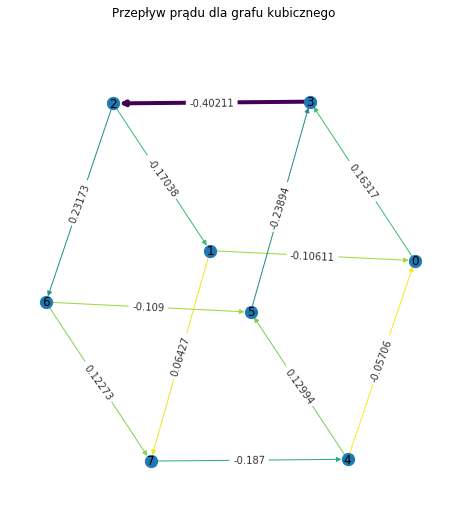

In [252]:
draw_graph(G, I, position, "Przepływ prądu dla grafu kubicznego")

e) Wykorzystując metodę potencjałów węzłowych zaimplementuj alternatywne rozwiązanie problemu.

In [253]:
def solve_potential_nodes(graph):
    pass

#### Sprawdźmy teraz poprawność zwracanych wyników

Posłuży nam do tego funkcja, która sprawdza $I$ Prawa Kirchoffa dla każdego węzła oraz $II$ Prawa Kirchoffa dla każdego cyklu bazowego, korzystając z otrzymanych wcześniej wyników.

In [254]:
def check_kirchhoff_laws(graph, I):
    eps = 10**(-6)
    
    #first Kirchhoff Law
    for u in graph.nodes:
        curr = 0.0
        for v in graph[u]:
            c =  I[graph[u][v]['index']] if u < v else -I[graph[u][v]['index']]
            curr += c
        #should be ~0
        if abs(curr) > eps:
            print("I Kirchhoff Law failed")
            return False
    
    # second Kirchoff Law
    cycle_basis = nx.cycle_basis(graph)
    for c, cycle in enumerate(cycle_basis):
        curr_sem = 0.0
        curr_r = 0.0
        for i, u in enumerate(cycle):
            
            v = cycle[(i + 1) % len(cycle)]
            r = graph[u][v]['R']
            curr_sem += graph[u][v]['sem']
            i =  I[graph[u][v]['index']] if u < v else -I[graph[u][v]['index']]
            curr_r += i * r
             
        if abs(curr_sem - curr_r) > eps:
            print("II Kirchhoff Law failed")
            return False
    print("Kirchoff laws met")
    return True

In [255]:
check_kirchhoff_laws(G, I)

Kirchoff laws met


True

f) Przedstaw (wizualizacja + sprawdzenie poprawności wyników) działanie programu dla grafów spójnych mających od 15 do 100 wierzchołków:

- Spójny graf losowy
- Graf 3-regularny (kubiczny)
- Graf złożony z dwóch grafów losowych połączonych mostkiem
- Graf siatka 2D

Ponieważ wyżej wykonaliśmy wymagane czynności dla grafu kubicznego, przetestujemy tylko pozostałe 3 grafy

In [256]:
def test_graph(file_name):
    graph = read_graph_from_file(file_name)
    print_graph(graph)
    s = int(input("Podaj s - "))
    t = int(input("Podaj s - "))
    E = int(input("Podaj s - "))
    add_sem(graph, s, t, E)
    position = nx.kamada_kawai_layout(graph)
    I = solve_kirchoff(graph)
    check_kirchhoff_laws(graph, I)
    draw_graph(graph, I, position, f"Przepływ prądu w grafie {file_name}")

#### Spójny graf losowy

u - 0, v - 2, R = 24.826465883382596, sem = 0, idx = 0
u - 0, v - 5, R = 50.44149901286048, sem = 0, idx = 1
u - 0, v - 8, R = 90.65991633349091, sem = 0, idx = 2
u - 0, v - 9, R = 46.1448066338642, sem = 0, idx = 3
u - 0, v - 10, R = 84.84707220306079, sem = 0, idx = 4
u - 0, v - 12, R = 24.09750378766996, sem = 0, idx = 5
u - 0, v - 13, R = 88.84587977894331, sem = 0, idx = 6
u - 0, v - 14, R = 21.915085521097488, sem = 0, idx = 7
u - 0, v - 15, R = 11.699246380485672, sem = 0, idx = 8
u - 0, v - 17, R = 8.527502973756462, sem = 0, idx = 9
u - 0, v - 19, R = 32.41444248320073, sem = 0, idx = 10
u - 0, v - 24, R = 2.9171756244672054, sem = 0, idx = 11
u - 0, v - 25, R = 4.151056155767952, sem = 0, idx = 12
u - 0, v - 27, R = 94.07122696313415, sem = 0, idx = 13
u - 0, v - 29, R = 68.97721630999554, sem = 0, idx = 14
u - 0, v - 30, R = 41.55583514414568, sem = 0, idx = 15
u - 0, v - 33, R = 33.955005022940696, sem = 0, idx = 16
u - 0, v - 37, R = 98.04760358876324, sem = 0, idx = 17
u 

Podaj s - 0
Podaj s - 15
Podaj s - 150
Kirchoff laws met


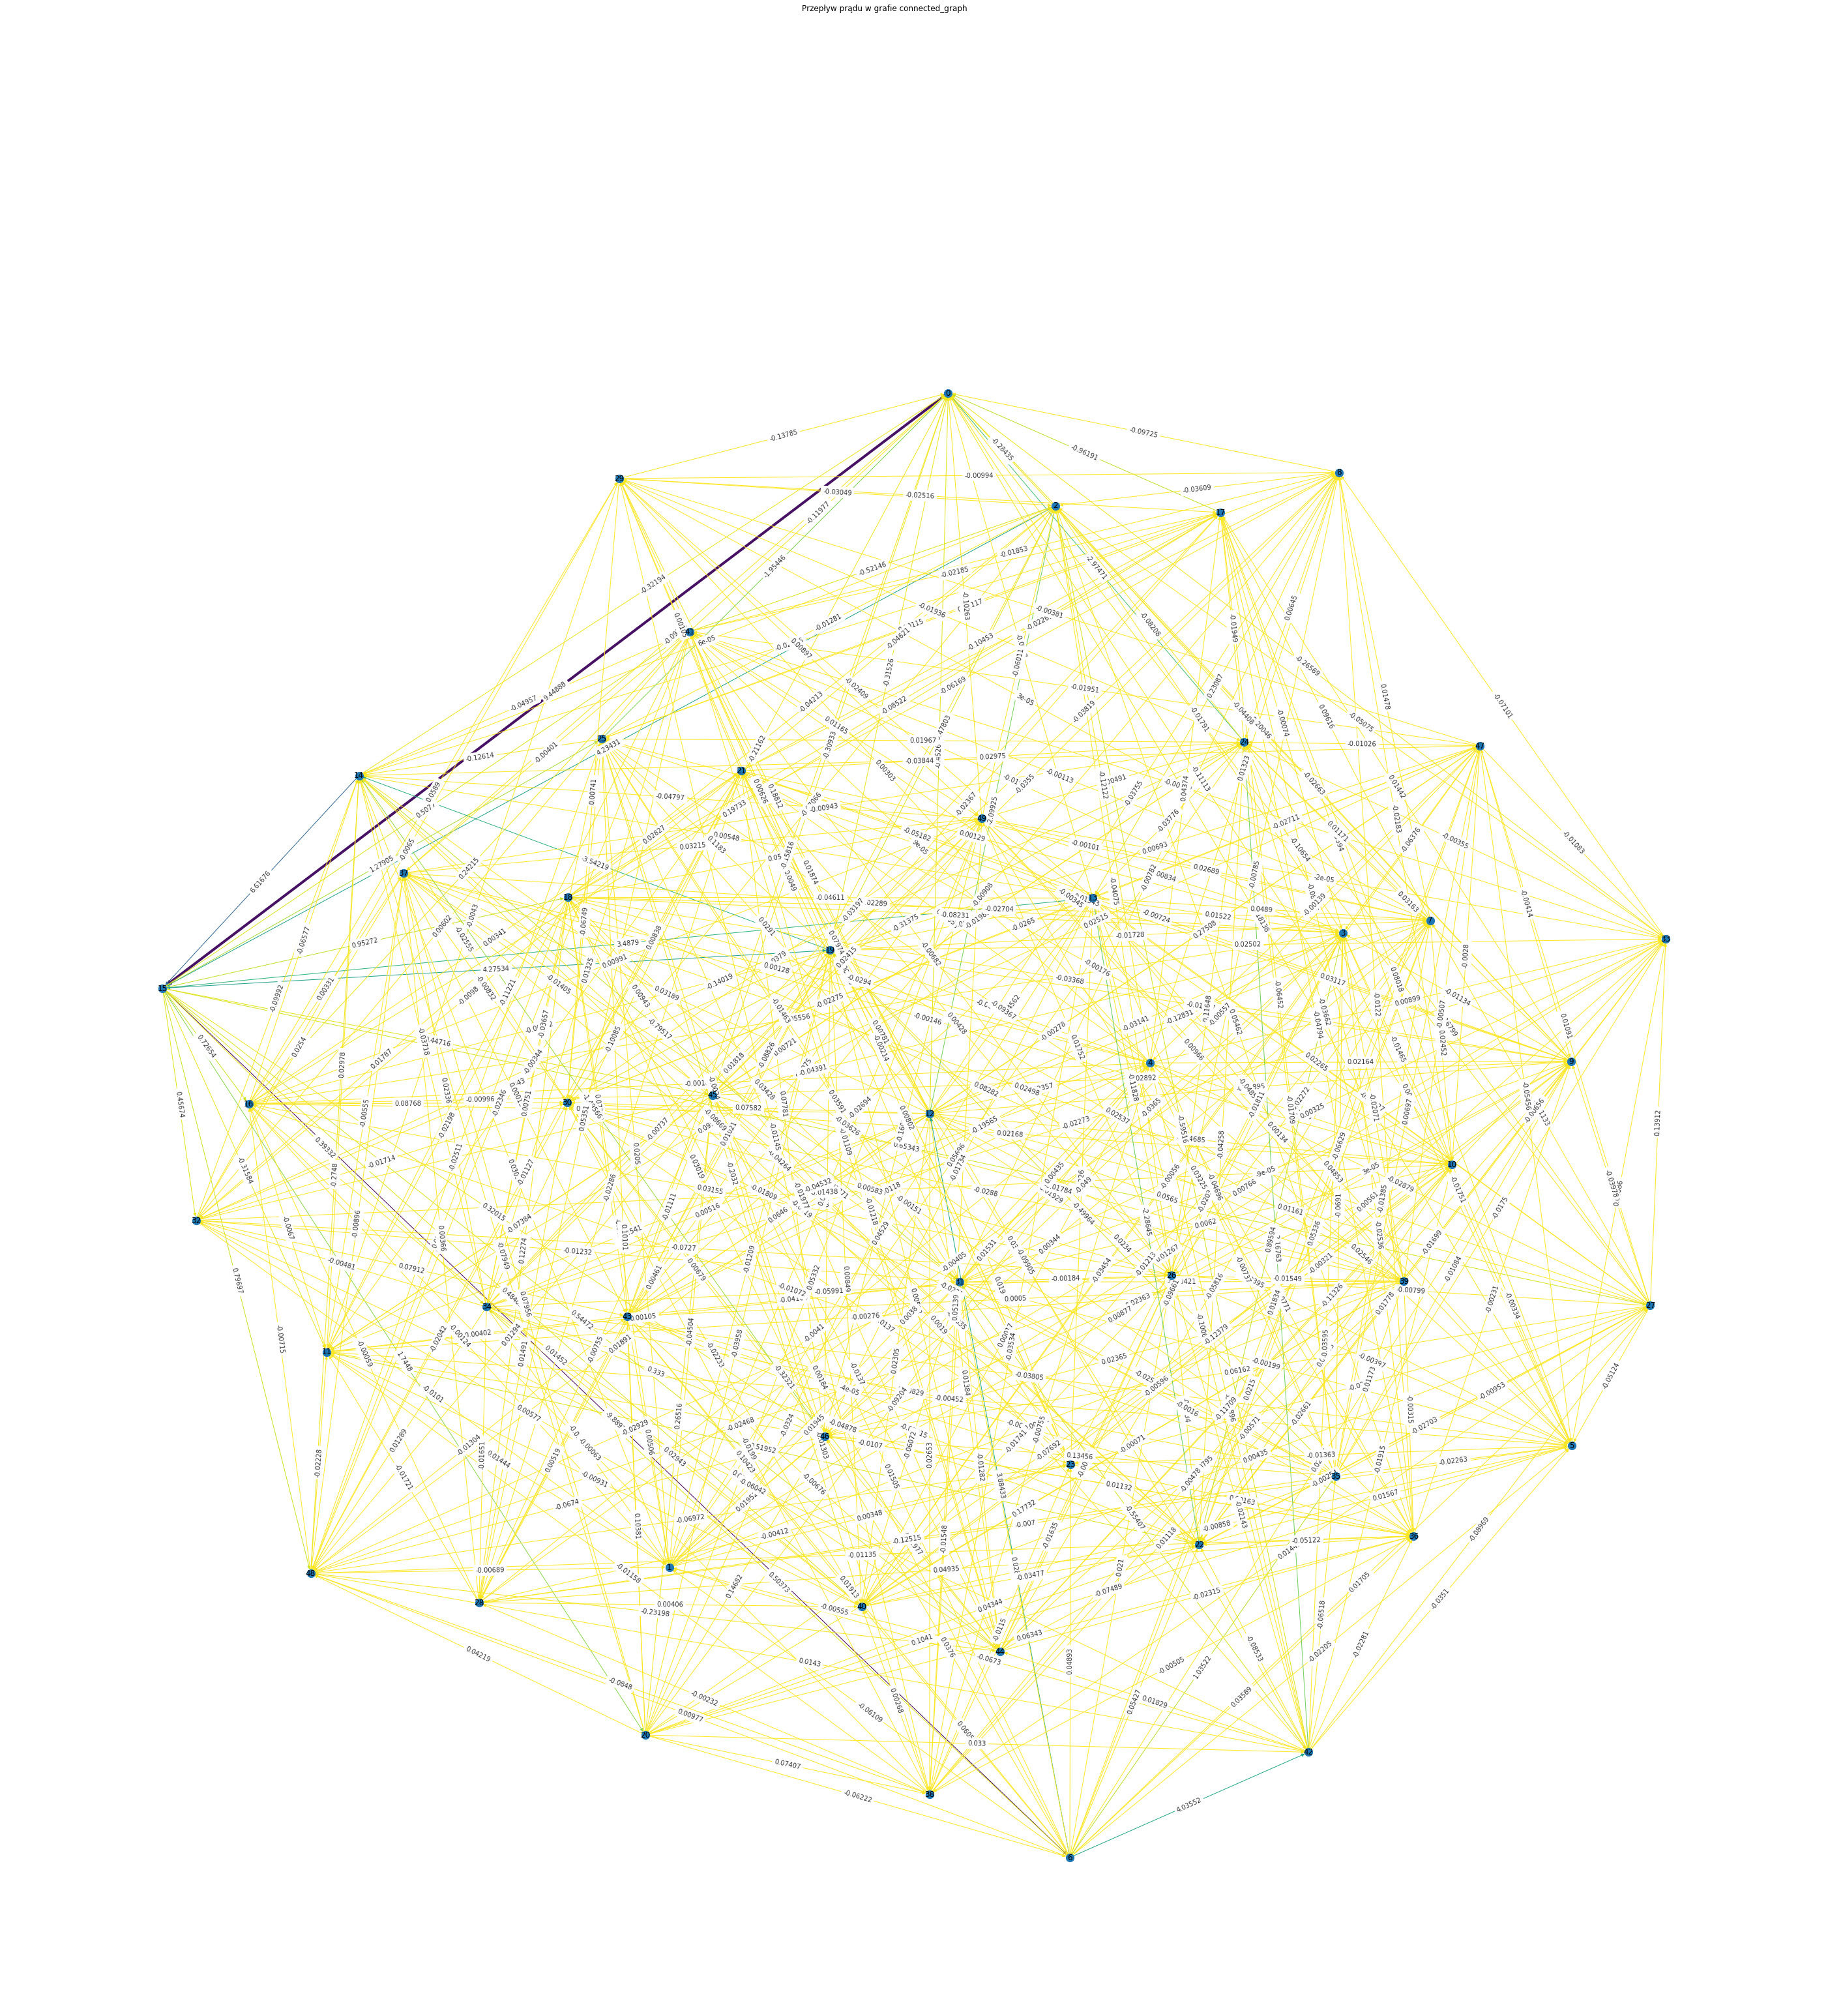

In [257]:
test_graph("connected_graph")

#### Graf złożony z dwóch grafów losowych połączonych mostkiem

u - 0, v - 1, R = 42.774267667693, sem = 0, idx = 0
u - 0, v - 2, R = 19.018639160198436, sem = 0, idx = 1
u - 0, v - 5, R = 8.012678848685717, sem = 0, idx = 2
u - 0, v - 7, R = 59.86616096924454, sem = 0, idx = 3
u - 0, v - 8, R = 14.946357981647008, sem = 0, idx = 4
u - 0, v - 12, R = 19.336221994328074, sem = 0, idx = 5
u - 0, v - 13, R = 12.116048871321594, sem = 0, idx = 6
u - 0, v - 14, R = 68.68981704490378, sem = 0, idx = 7
u - 0, v - 16, R = 12.047404355316694, sem = 0, idx = 8
u - 1, v - 3, R = 77.56384797784787, sem = 0, idx = 9
u - 1, v - 9, R = 46.331160859978205, sem = 0, idx = 10
u - 1, v - 11, R = 75.96488097034081, sem = 0, idx = 11
u - 1, v - 12, R = 2.209083760851238, sem = 0, idx = 12
u - 1, v - 13, R = 7.537633674705568, sem = 0, idx = 13
u - 1, v - 14, R = 26.60082488796248, sem = 0, idx = 14
u - 2, v - 4, R = 69.52093794839452, sem = 0, idx = 15
u - 2, v - 6, R = 62.06743627118732, sem = 0, idx = 16
u - 2, v - 8, R = 7.981760063821886, sem = 0, idx = 17
u - 2, v

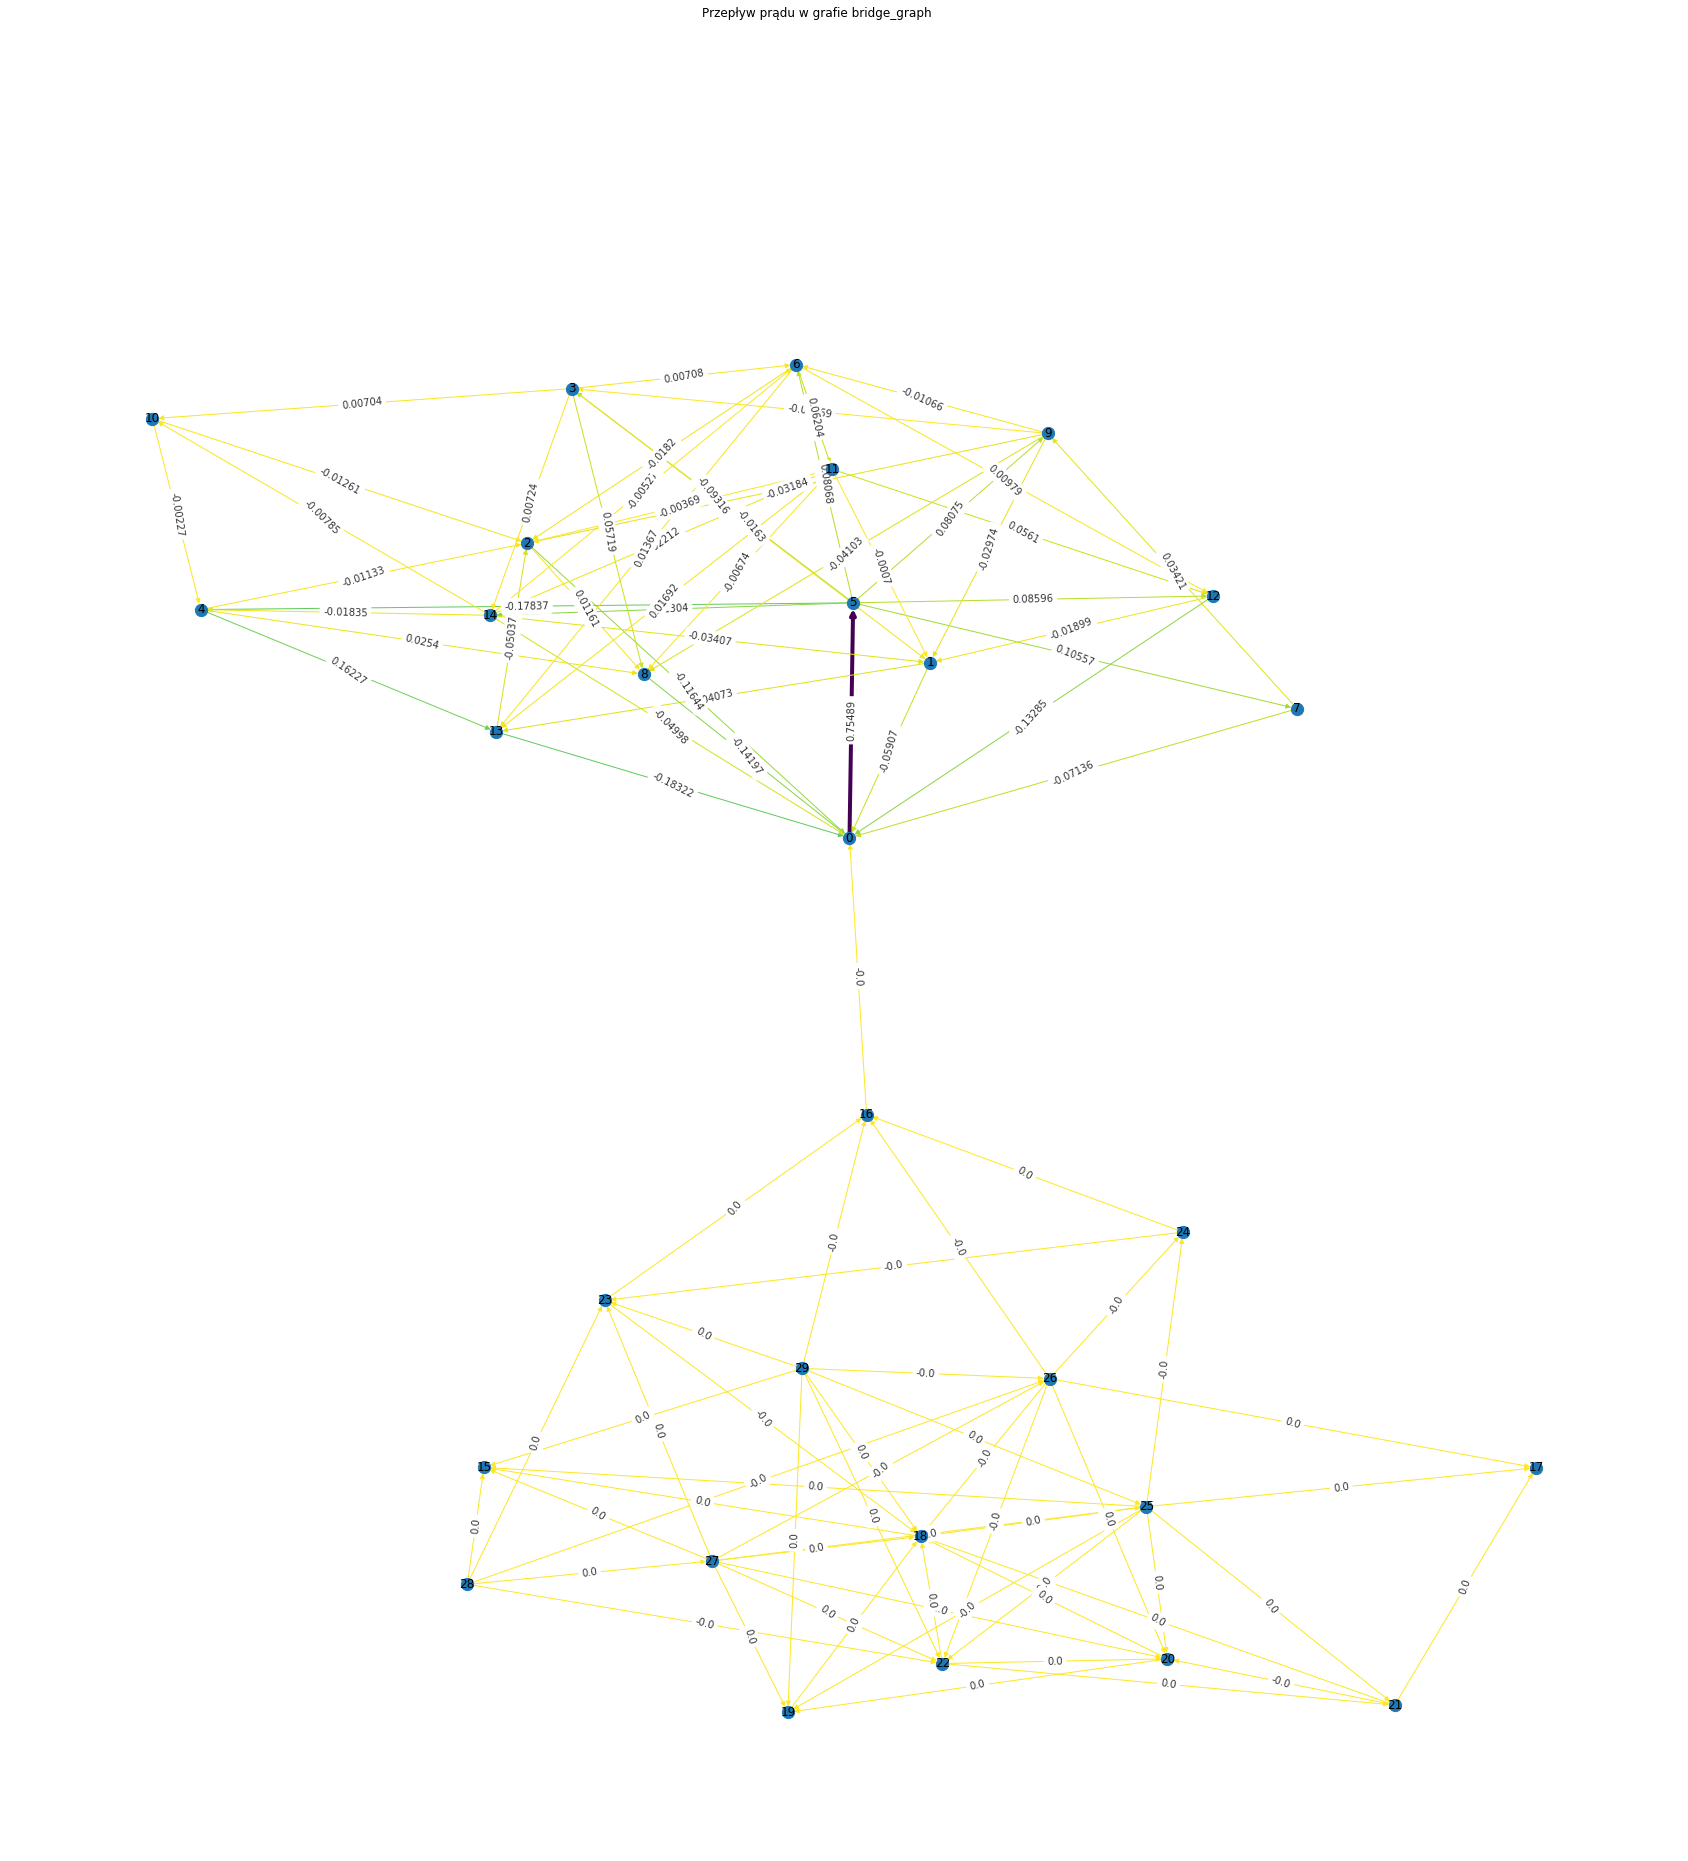

In [259]:
test_graph("bridge_graph")

#### Graf siatka 2D

u - 0, v - 4, R = 89.78492290745282, sem = 0, idx = 0
u - 0, v - 1, R = 98.49414434822192, sem = 0, idx = 1
u - 4, v - 8, R = 19.08993665718164, sem = 0, idx = 2
u - 4, v - 5, R = 79.47352992338195, sem = 0, idx = 3
u - 1, v - 5, R = 2.4080182004394546, sem = 0, idx = 4
u - 1, v - 2, R = 95.47387547337898, sem = 0, idx = 5
u - 8, v - 12, R = 98.0761811538139, sem = 0, idx = 14
u - 8, v - 9, R = 37.38401021680182, sem = 0, idx = 15
u - 5, v - 9, R = 82.52006826322533, sem = 0, idx = 6
u - 5, v - 6, R = 46.977958790184836, sem = 0, idx = 7
u - 2, v - 6, R = 3.4650639638399316, sem = 0, idx = 8
u - 2, v - 3, R = 84.02737160442875, sem = 0, idx = 9
u - 9, v - 13, R = 19.666775927261682, sem = 0, idx = 16
u - 9, v - 10, R = 96.47522611649478, sem = 0, idx = 17
u - 6, v - 10, R = 65.34349800360894, sem = 0, idx = 10
u - 6, v - 7, R = 13.381406892009263, sem = 0, idx = 11
u - 3, v - 7, R = 41.73601900130628, sem = 0, idx = 12
u - 10, v - 14, R = 91.07407810360854, sem = 0, idx = 18
u - 10, v 

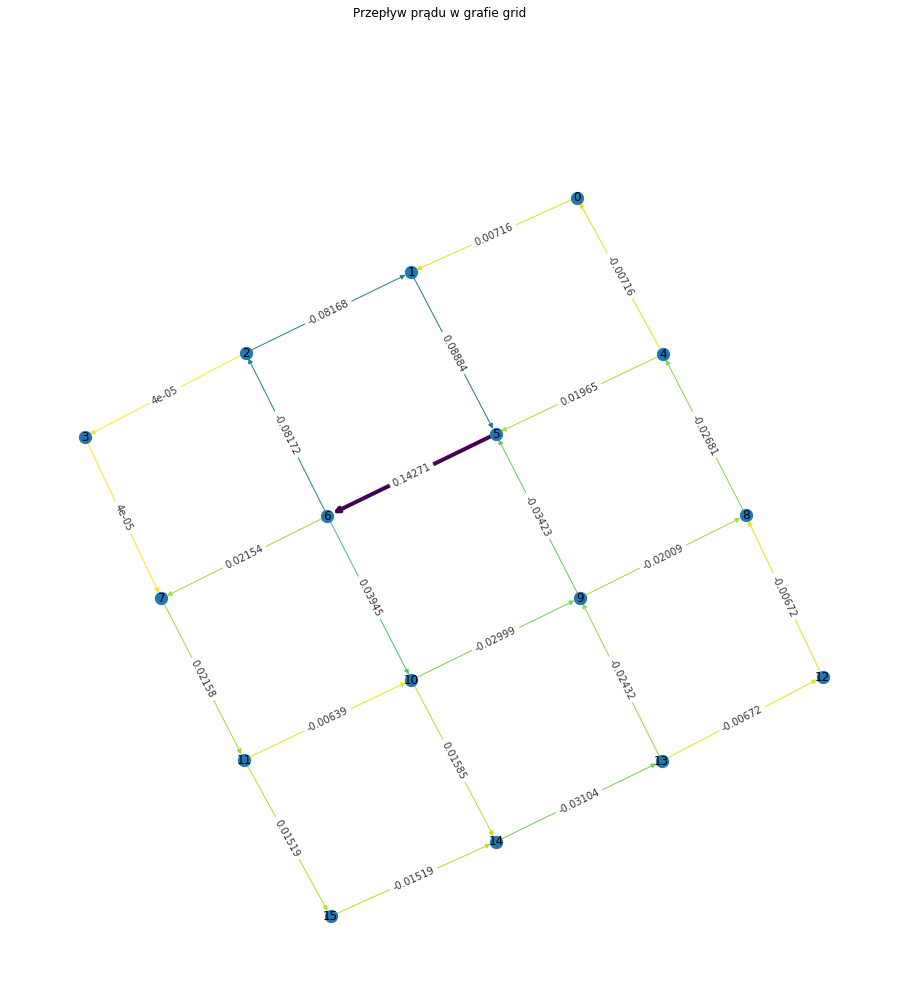

In [260]:
test_graph("grid")